<a href="https://colab.research.google.com/github/Prathibha-bm/take_it_smart/blob/main/class17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Analyze netflix data to unserstand content growth and type distribution (movies and shows ) and country contribution.

1)how many total titles are on netflix

2)MOVIE VS TV SHOWS

3)content grown over time (how)?

4)which contries produce more content

5)what are the most common genre

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB
show_id            0
type               0
title              0
director        2588
country          287
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
dtype: int64
show_id         0
type            0
title           0
director        0
country         0
date_added      0
releas

/tmp/ipython-input-519/2952401526.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna(df['director'].mode()[0],inplace=True)


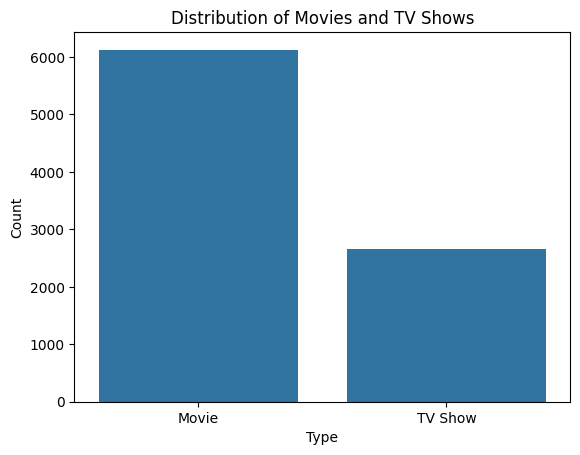

year
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     426
2017    1185
2018    1648
2019    2016
2020    1879
2021    1498
Name: count, dtype: int64


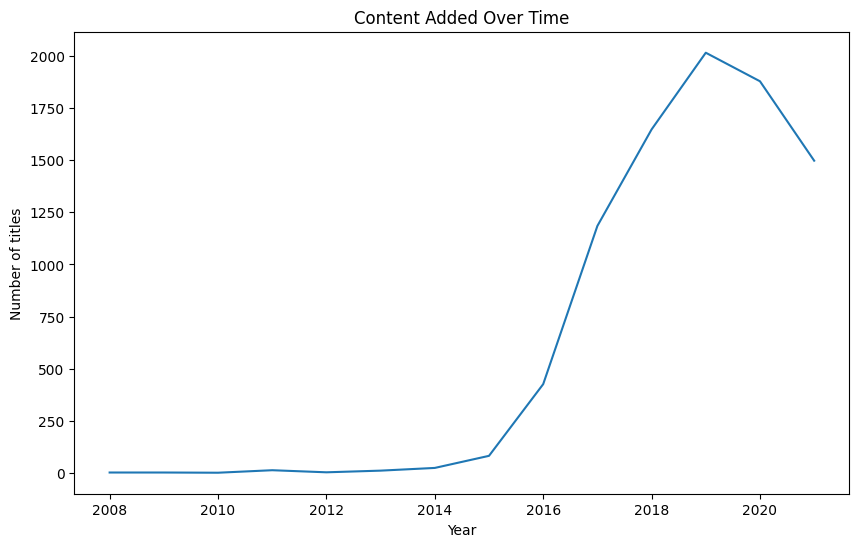

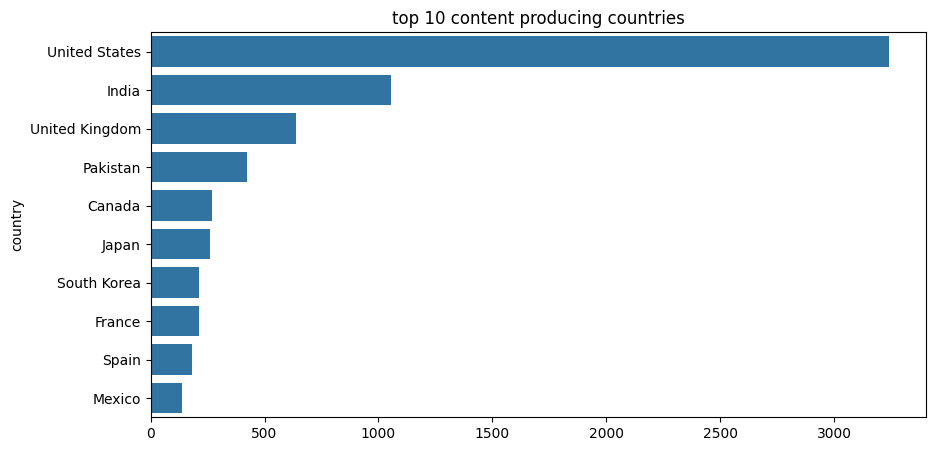

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            219
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64


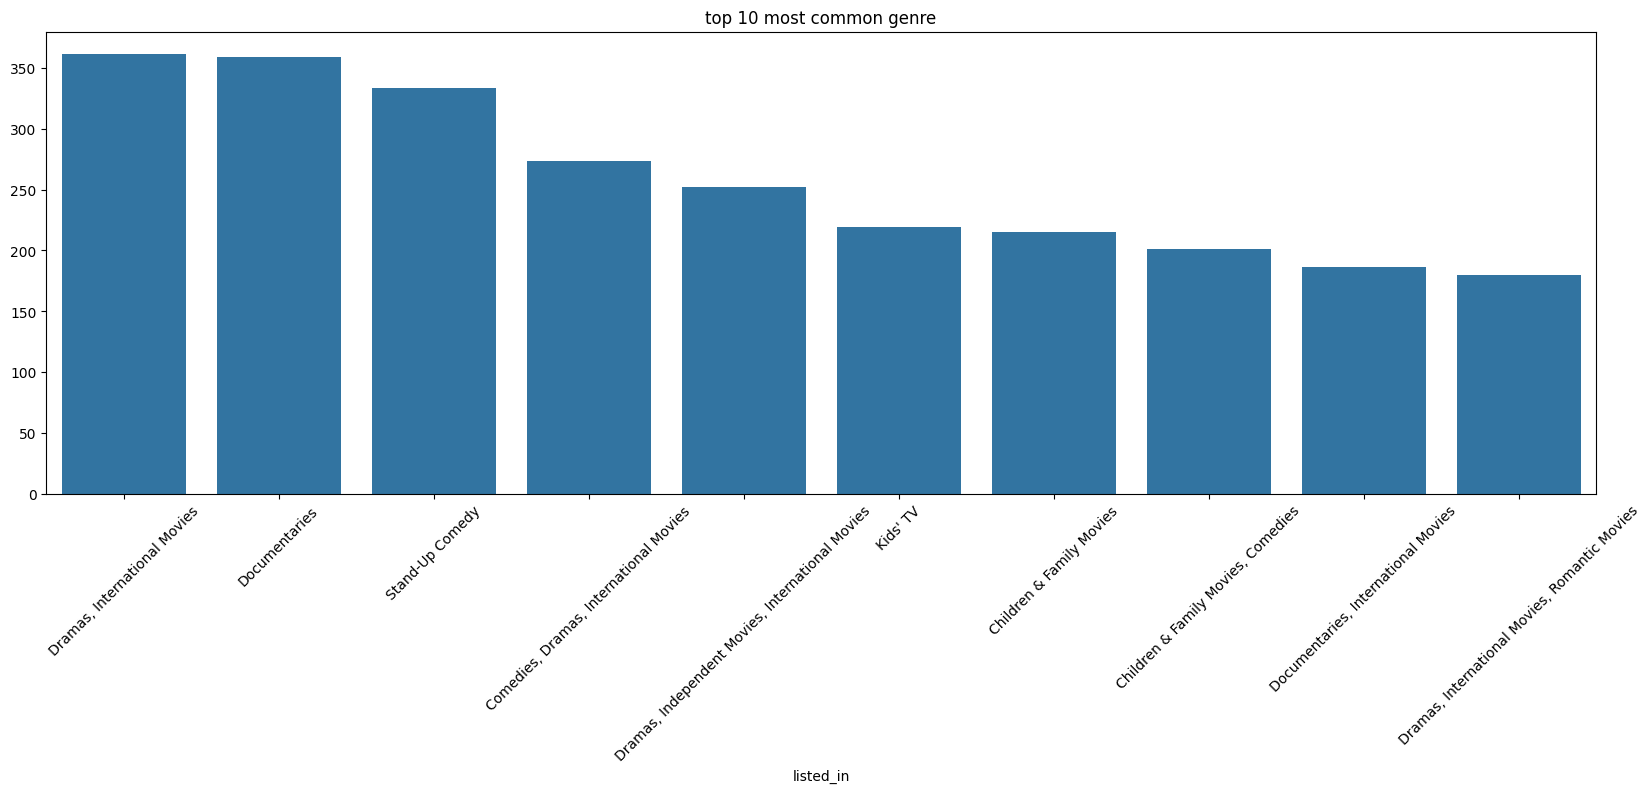

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64


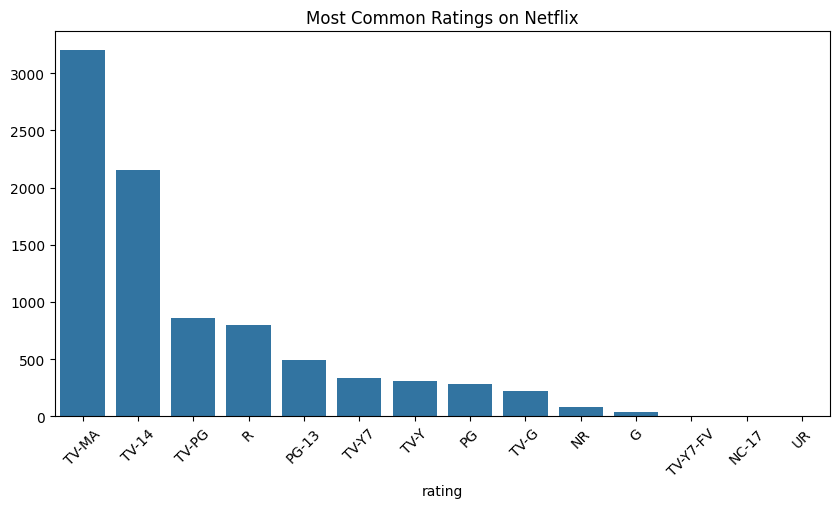

In [7]:
#netflix dataset
import pandas as pd
df=pd.read_csv('/content/netflix1.csv')
df.head()
df.columns
df.info()
df.describe()

print((df=='Not Given').sum())
df=df.replace('Not Given',pd.NA)
print((df=='Not Given').sum())
df.head(28)

df['director'].fillna(df['director'].mode()[0],inplace=True)
print(df.isnull().sum())


df.head(20)
df['director']=df['director'].fillna(df['director'].mode()[0])
print(df.isnull().sum())

#convert data to date time

df['date_added']=pd.to_datetime(df['date_added'])
df['year']=df['date_added'].dt.year
df.head()

#1) how many total titles are on netflix
t_title=df.shape[0]
print(t_title)

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='type', data=df)

plt.title('Distribution of Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

#3) content grown over time (how)?

year_counts=df['year'].value_counts().sort_index()
print(year_counts)
plt.figure(figsize=(10,6))
year_counts.plot(kind='line')

plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Number of titles')
plt.show()

#4)which countris produce more content
top_countries=df['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values,y=top_countries.index)

plt.title('top 10 content producing countries')

plt.show()


#5) what are the most common genre
genre_count=df['listed_in'].value_counts().head(10)
print(genre_count)
plt.figure(figsize=(20,6))
sns.barplot(x=genre_count.index,y=genre_count.values)
plt.xticks(rotation=45)
plt.title('top 10 most common genre')
plt.show()

import plotly.express as px
fig=px.histogram(
    df,
    x='year',
    color='type',
    animation_frame='year',
    title='Netflix content over years',
)
fig.show()

#6
rating_counts = df['rating'].value_counts()
print(rating_counts)

plt.figure(figsize=(10,5))
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.xticks(rotation=45)
plt.title('Most Common Ratings on Netflix')
plt.show()


#6) which rating is most common

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64


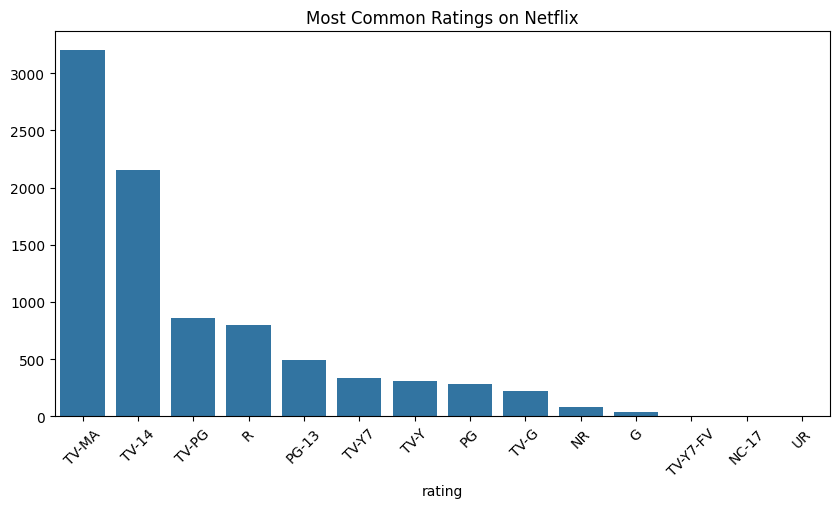

In [8]:
#6
rating_counts = df['rating'].value_counts()
print(rating_counts)

plt.figure(figsize=(10,5))
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.xticks(rotation=45)
plt.title('Most Common Ratings on Netflix')
plt.show()

#7)which genre dominates in India vs Us?

director
Rajiv Chilaka             2608
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Youssef Chahine             12
Martin Scorsese             12
Name: count, dtype: int64


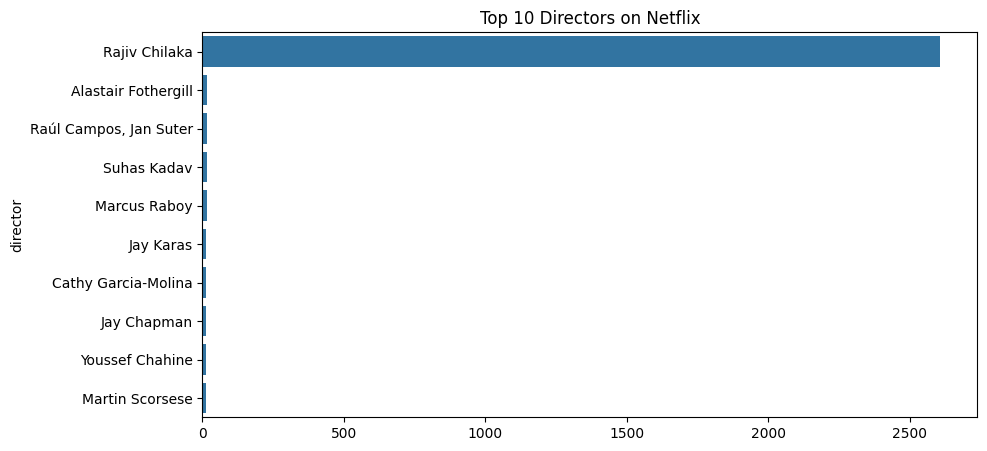

In [9]:
#7
top_directors = df['director'].value_counts().head(10)
print(top_directors)

plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 10 Directors on Netflix')
plt.show()

8) top 10 directors with most titles


director
Rajiv Chilaka             2608
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Youssef Chahine             12
Martin Scorsese             12
Name: count, dtype: int64


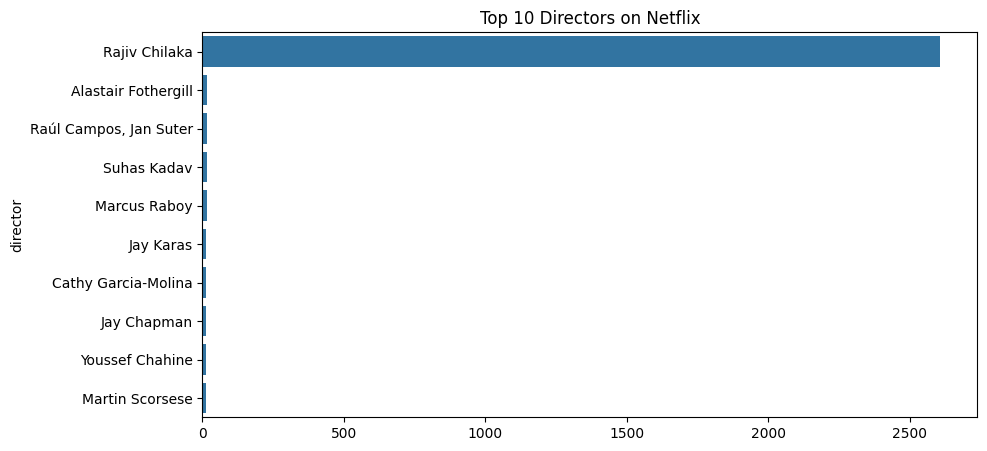

In [11]:
top_directors = df['director'].value_counts().head(10)
print(top_directors)

plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 10 Directors on Netflix')
plt.show()

#4.2 Task : Animate using plotly for all the data

1) Distribution of Movies and TV Shows

In [12]:
import pandas as pd
df=pd.read_csv('/content/netflix1.csv')
df.head()

import plotly.express as px

fig = px.histogram(
    df,
    x='type',
    title='Distribution of Movies and TV Shows',
    color='type'
)
fig.show()

Content Added Over Time

In [19]:
import pandas as pd
df=pd.read_csv('/content/netflix1.csv')
df.head()

df['date_added'] = pd.to_datetime(df['date_added'])
df['year'] = df['date_added'].dt.year

year_counts = df['year'].value_counts().sort_index().reset_index()
year_counts.columns = ['year', 'count']

fig = px.line(
    year_counts,
    x='year',
    y='count',
    title='Content Added Over Time',
    markers=True
)
fig.show()

Top 10 Content Producing Countries

In [14]:
top_countries = df['country'].value_counts().head(10).reset_index()
top_countries.columns = ['country', 'count']
fig = px.bar(
    top_countries,
    x='count',
    y='country',
    orientation='h',
    title='Top 10 Content Producing Countries'
)

fig.show()

Top 10 Most Common Genres

In [15]:
genre_count = df['listed_in'].value_counts().head(10).reset_index()
genre_count.columns = ['genre', 'count']
fig = px.bar(
    genre_count,
    x='genre',
    y='count',
    title='Top 10 Most Common Genres'
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()